# EDA on the `MLA_100k_checked_v3` dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils import *

## Load the dataset

In [2]:
X_dataframe = pd.read_csv("../data/X_dataframe.csv")
X_dataframe.head()

,seller_address,warranty,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,price,attributes,...,date_created,secure_thumbnail,stop_time,status,video_id,initial_quantity,start_time,sold_quantity,available_quantity,used
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,80.0,[],...,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,NaN,1,1441485773000,0,1,False
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,2650.0,[],...,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,NaN,1,1443290910000,0,1,True
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,60.0,[],...,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,NaN,1,1441843027000,0,1,True
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,580.0,[],...,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,NaN,1,1443466076000,0,1,False
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,30.0,[],...,2015-08-24T22:07:20.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445638040000,active,NaN,1,1440454040000,0,1,True


# Non-mercadopago Payment Methods

In [3]:
X_dataframe["non_mercado_pago_payment_methods"].describe()

count     90000
unique      174
top          []
freq      27531
Name: non_mercado_pago_payment_methods, dtype: object

In [4]:
X_dataframe["non_mercado_pago_payment_methods"].value_counts()

non_mercado_pago_payment_methods
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        27531
[{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}]                                                                                                                                       

In [5]:
X_dataframe["non_mercado_pago_payment_methods"].isna().sum()


np.int64(0)

In [9]:
import ast

X_dataframe["non_mercado_pago_payment_methods"] = X_dataframe[
    "non_mercado_pago_payment_methods"
].apply(ast.literal_eval)

In [10]:
all_methods = [
    m["description"]
    for methods in X_dataframe["non_mercado_pago_payment_methods"]
    if methods
    for m in methods
]
all_methods = list(set(all_methods))
all_methods

['Giro postal',
 'Diners',
 'Visa',
 'Contra reembolso',
 'Tarjeta de crédito',
 'American Express',
 'MercadoPago',
 'Visa Electron',
 'Transferencia bancaria',
 'Mastercard Maestro',
 'MasterCard',
 'Acordar con el comprador',
 'Cheque certificado',
 'Efectivo']

#### Tarjetas

In [11]:
tarjetas = [
    "Tarjeta de crédito",
    "Visa Electron",
    "Mastercard Maestro",
    "American Express",
    "Mastercard",
    "Diners",
    "Visa",
]

X_dataframe["tarjeta"] = X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] in tarjetas for m in x))
X_dataframe["tarjeta"].value_counts()

tarjeta
False    67240
True     22760
Name: count, dtype: int64

In [12]:
res = column_analysis("tarjeta", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
tarjeta,,,,
False,67240,0.519795,0.516017,0.523570
True,22760,0.294244,0.288359,0.300199


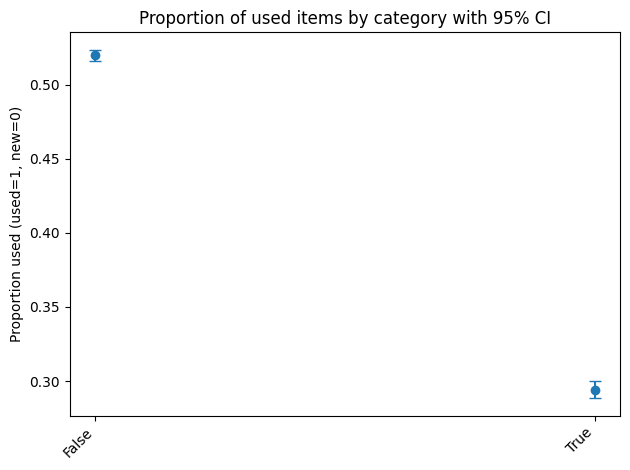

In [13]:
plot_column_analysis(res)

There's a difference in distribution depending if it accepts cards or not

#### Efectivo

In [14]:
X_dataframe["efectivo"]=X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Efectivo" for m in x))
X_dataframe["efectivo"].value_counts()

efectivo
True     60350
False    29650
Name: count, dtype: int64

In [15]:
res = column_analysis("efectivo", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
efectivo,,,,
False,29650,0.499764,0.494073,0.505455
True,60350,0.444573,0.440612,0.448541


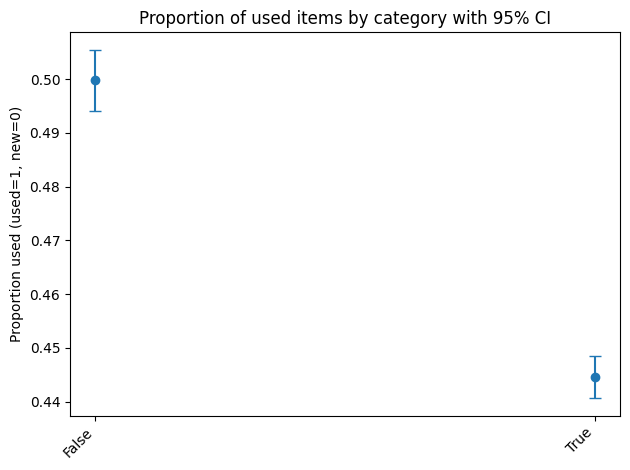

In [16]:
plot_column_analysis(res)

Very slight difference in distribution of "Efectivo" true or false

#### Mercadopago

In [17]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "MercadoPago" for m in x)).value_counts()

non_mercado_pago_payment_methods
False    89354
True       646
Name: count, dtype: int64

#### Contra reembolso

In [19]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Contra reembolso" for m in x)).value_counts()

non_mercado_pago_payment_methods
False    89430
True       570
Name: count, dtype: int64

99% of the "contra-reembolso" are False. Doesn't add information by itself

#### Cheque certificado

In [20]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Cheque certificado" for m in x)).value_counts()

non_mercado_pago_payment_methods
False    89588
True       412
Name: count, dtype: int64

99% of the "cheque certificado" are False. Doesn't add information by itself

#### Giro postal

In [21]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Giro postal" for m in x)).value_counts()

non_mercado_pago_payment_methods
False    88511
True      1489
Name: count, dtype: int64

98% of the "giro postal" values are False. Doesn't add information by itself

#### Transferencia Bancaria

In [22]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Transferencia bancaria" for m in x)).value_counts()

non_mercado_pago_payment_methods
True     46300
False    43700
Name: count, dtype: int64

In [23]:
X_dataframe["transferencia_bancaria"] = X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Transferencia bancaria" for m in x))
res = column_analysis("transferencia_bancaria", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
transferencia_bancaria,,,,
False,43700,0.542494,0.537820,0.547161
True,46300,0.387495,0.383066,0.391941


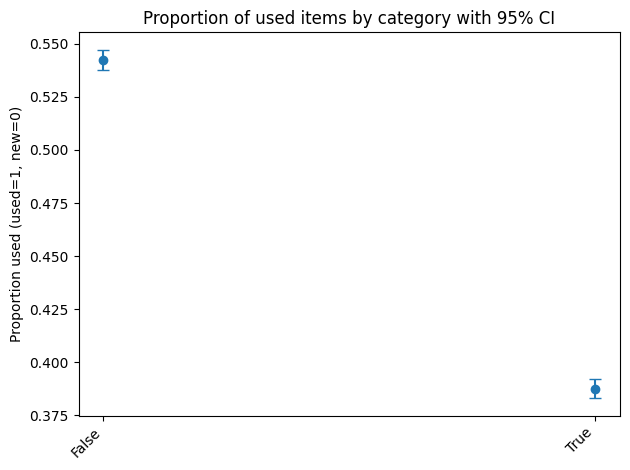

In [24]:
plot_column_analysis(res)

Slightly different distribution conditioned on if it accepts "transferencia bancaria" or not

#### Acordar con el comprador

In [25]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Acordar con el comprador" for m in x)).value_counts()

non_mercado_pago_payment_methods
False    82825
True      7175
Name: count, dtype: int64

In [26]:
X_dataframe["acordar_comprador"] = X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Acordar con el comprador" for m in x))
res = column_analysis("acordar_comprador", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
acordar_comprador,,,,
True,7175,0.547735,0.536196,0.559223
False,82825,0.455394,0.452004,0.458788


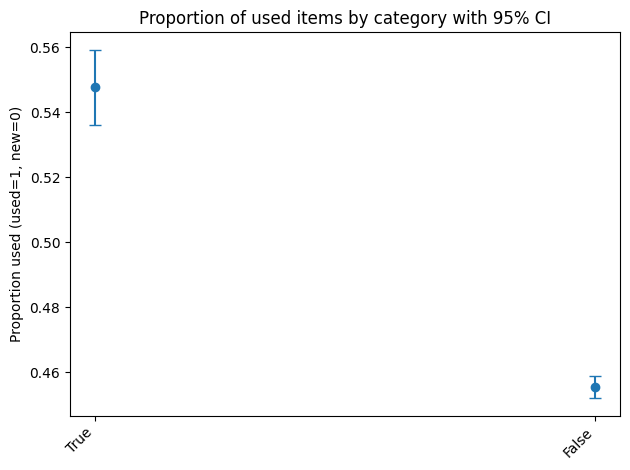

In [27]:
plot_column_analysis(res)

Slightly different distribution conditioned on if it accepts "transferencia bancaria" or not

#### Number of payment methods

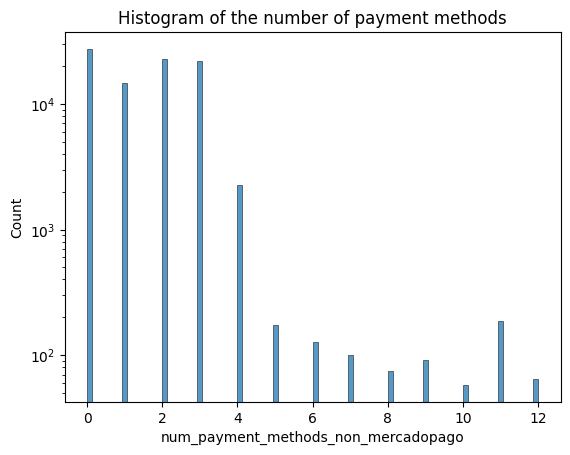

In [28]:
X_dataframe["num_payment_methods_non_mercadopago"]=X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: len(x))
# Histogram of the number of payment methods
sns.histplot(X_dataframe["num_payment_methods_non_mercadopago"])
plt.title("Histogram of the number of payment methods")
plt.yscale("log")
plt.show()


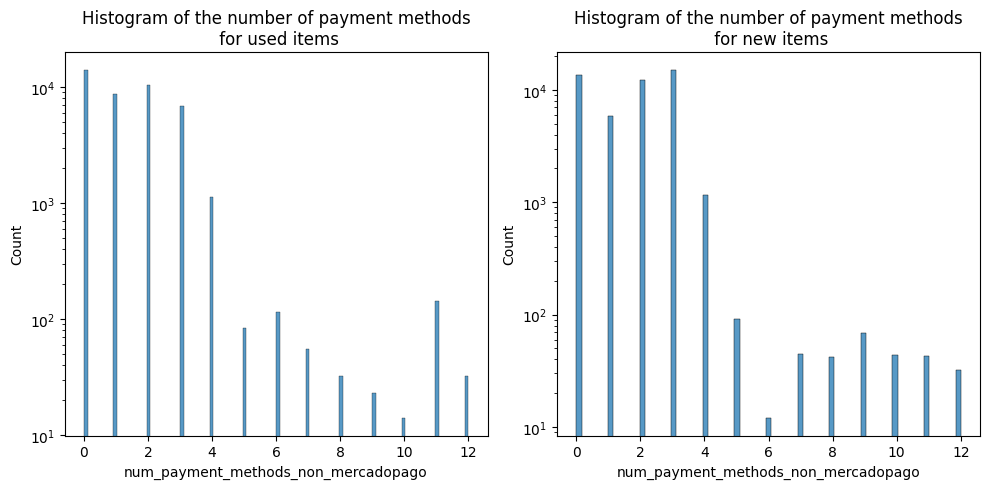

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 1]["num_payment_methods_non_mercadopago"], ax=ax[0])
ax[0].set_title("Histogram of the number of payment methods\n for used items")
sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["num_payment_methods_non_mercadopago"], ax=ax[1])
ax[1].set_title("Histogram of the number of payment methods\n for new items")
ax[1].set_yscale("log")
ax[0].set_yscale("log")
plt.tight_layout()
plt.show()  

In [30]:
pearson_corr = X_dataframe[["used", "num_payment_methods_non_mercadopago"]].corr(method="pearson")
spearman_corr = X_dataframe[["used", "num_payment_methods_non_mercadopago"]].corr(method="spearman")
kendall_corr = X_dataframe[["used", "num_payment_methods_non_mercadopago"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("--------------------------------")
print("Spearman correlation: ", spearman_corr)
print("--------------------------------")
print("Kendall correlation: ", kendall_corr)
print("--------------------------------")


Pearson correlation:                                           used  \
used                                 1.000000   
num_payment_methods_non_mercadopago -0.114886   

                                     num_payment_methods_non_mercadopago  
used                                                           -0.114886  
num_payment_methods_non_mercadopago                             1.000000  
--------------------------------
Spearman correlation:                                           used  \
used                                 1.000000   
num_payment_methods_non_mercadopago -0.140328   

                                     num_payment_methods_non_mercadopago  
used                                                           -0.140328  
num_payment_methods_non_mercadopago                             1.000000  
--------------------------------
Kendall correlation:                                           used  \
used                                 1.000000   
num_payment_methods_non

In [31]:
X_dataframe["num_payment_methods_non_mercadopago"].value_counts()

num_payment_methods_non_mercadopago
0     27531
2     22688
3     22030
1     14594
4      2282
11      187
5       175
6       126
7       100
9        91
8        74
12       64
10       58
Name: count, dtype: int64

In [32]:
X_dataframe.loc[X_dataframe["num_payment_methods_non_mercadopago"] > 4].loc[X_dataframe["used"] == 1]["num_payment_methods_non_mercadopago"].value_counts()

num_payment_methods_non_mercadopago
11    144
6     114
5      84
7      55
12     32
8      32
9      23
10     14
Name: count, dtype: int64

In [33]:
X_dataframe.loc[X_dataframe["num_payment_methods_non_mercadopago"] > 4].loc[
    X_dataframe["used"] == 0
]["num_payment_methods_non_mercadopago"].value_counts()

num_payment_methods_non_mercadopago
5     91
9     68
7     45
10    44
11    43
8     42
12    32
6     12
Name: count, dtype: int64

In [34]:
X_dataframe["num_payment_methods_non_mercadopago"].apply(lambda x: 4 if x > 4 else x).value_counts()

num_payment_methods_non_mercadopago
0    27531
2    22688
3    22030
1    14594
4     3157
Name: count, dtype: int64

In [35]:
X_dataframe.loc[X_dataframe["used"] == 0]["num_payment_methods_non_mercadopago"].apply(
    lambda x: 3 if x > 3 else x
).value_counts()

num_payment_methods_non_mercadopago
3    16685
0    13446
2    12337
1     5884
Name: count, dtype: int64

In [219]:
X_dataframe.loc[X_dataframe["used"] == 1]["num_payment_methods_non_mercadopago"].apply(
    lambda x: 3 if x > 3 else x
).value_counts()

num_payment_methods_non_mercadopago
0    14085
2    10351
1     8710
3     8502
Name: count, dtype: int64

There's a slight different distribution if it's new, there's more concentration in more payment methods 

# Accepts MercadoPago

In [3]:
res = column_analysis("accepts_mercadopago", X_dataframe)
res

,n,prop_used,ci_lower,ci_upper
accepts_mercadopago,,,,
False,1982,0.770434,0.751406,0.788415
True,88018,0.455827,0.452539,0.459119


In [6]:
X_dataframe["accepts_mercadopago"].isna().sum()

np.int64(0)

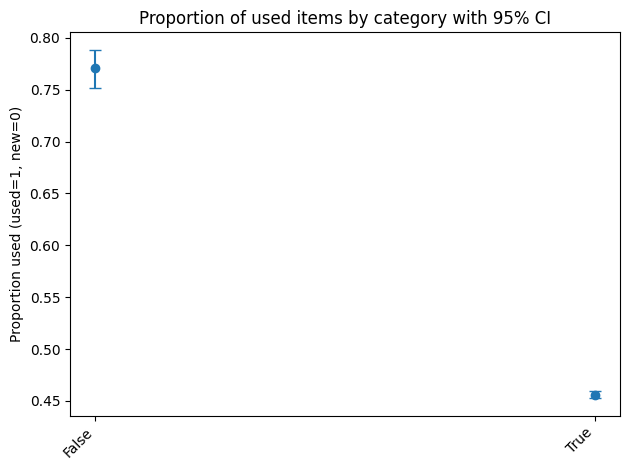

In [5]:
plot_column_analysis(res)

The amount of accepts_mercadopago is too small